In [45]:
#employee salary prediction using adult csv
#load your library
import pandas as pd

In [46]:
data=pd.read_csv(r"C:\Users\91828\Downloads\adult 3.csv")

In [47]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
data.shape

(48842, 15)

In [49]:
#null values
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [51]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [52]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [53]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [54]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [55]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [56]:
data.occupation.replace({'?':'others'},inplace=True)

C:\Users\91828\AppData\Local\Temp\ipykernel_13748\2240775719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'others'},inplace=True)


In [57]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [58]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [59]:
data.workclass.replace({'?':'NotListed'},inplace=True)

C:\Users\91828\AppData\Local\Temp\ipykernel_13748\2835487482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'NotListed'},inplace=True)


In [60]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [61]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [62]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [63]:
data.shape

(48811, 15)

In [64]:
data=data[data['education']!='5th-6th']
data=data[data['education']!='1st-4th']
data=data[data['education']!='Preschool']

In [65]:
print(data.education.value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


In [66]:
data.shape

(47972, 15)

In [67]:
#redundancy
data.drop(columns=['education'],inplace=True)

In [68]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


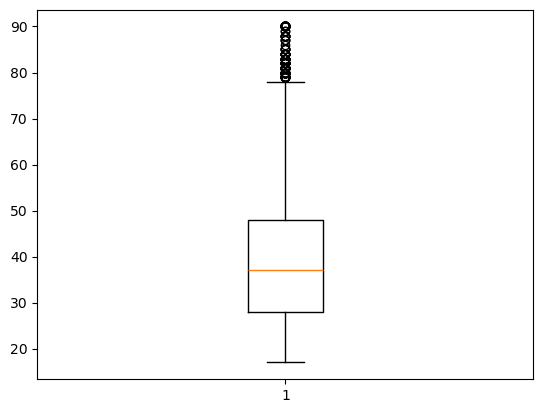

In [69]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [70]:
data=data[(data['age']<=75)&(data['age']>=17)]

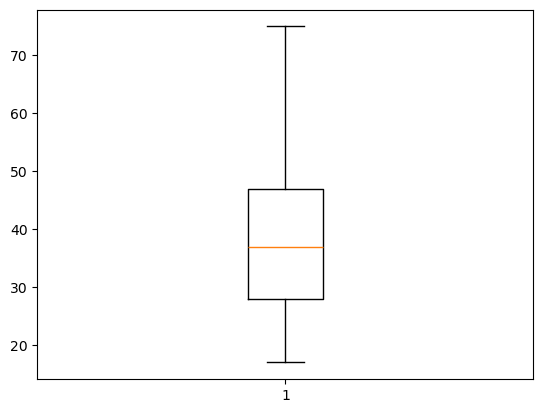

In [71]:
plt.boxplot(data['age'])
plt.show()

In [72]:
data.shape

(47619, 14)

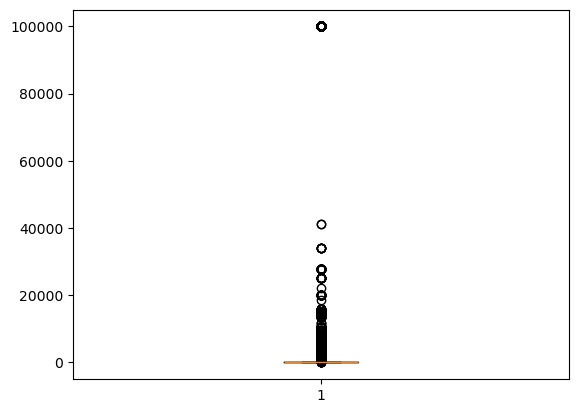

In [73]:
plt.boxplot(data['capital-gain'])
plt.show()

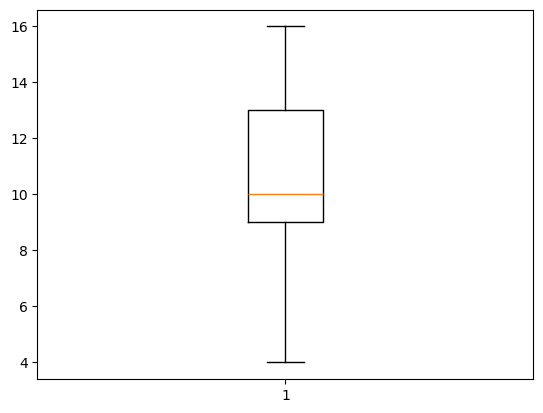

In [74]:
plt.boxplot(data['educational-num'])
plt.show()

In [75]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

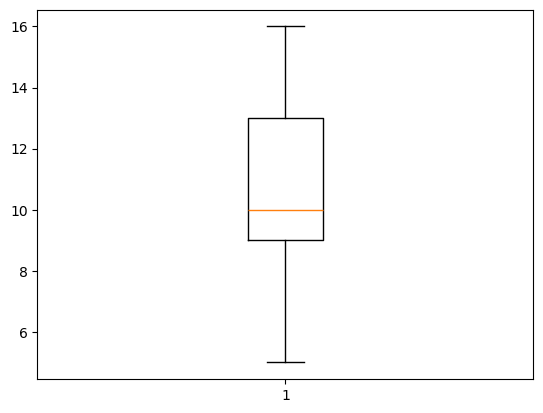

In [76]:
plt.boxplot(data['educational-num'])
plt.show()

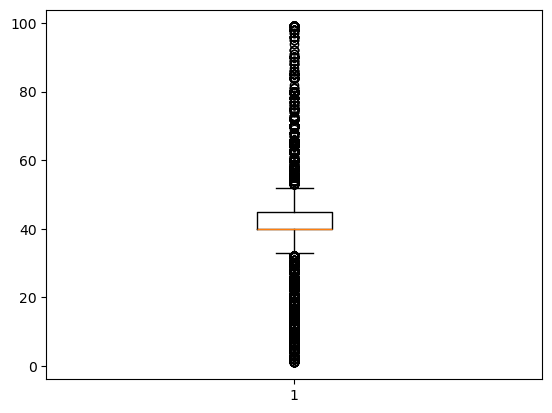

In [77]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [78]:
data.shape

(46720, 14)

In [79]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,14,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [80]:
x=data.drop(columns=['income']) #input
y=data['income'] #output
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,10,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,14,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [81]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 46720, dtype: object

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)

In [84]:
xtrain

array([[0.39655172, 0.83333333, 0.36288043, ..., 0.        , 0.14285714,
        0.95121951],
       [0.84482759, 0.5       , 0.1938611 , ..., 0.        , 0.39795918,
        0.04878049],
       [0.06896552, 0.33333333, 0.10241422, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.20689655, 0.        , 0.01943556, ..., 0.        , 0.55102041,
        0.95121951],
       [0.36206897, 0.5       , 0.05882357, ..., 0.        , 0.39795918,
        0.95121951],
       [0.74137931, 0.16666667, 0.02469564, ..., 0.        , 0.55102041,
        0.95121951]])

In [85]:
#machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain) #input and output training data
predict=knn.predict(xtest)
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.824486301369863

In [87]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain) #input and output training data
predict1=lr.predict(xtest)
predict1

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict1)

0.8209546232876712

In [89]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
clf.fit(xtrain,ytrain) #input and output training data
predict2=clf.predict(xtest)
predict2

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2)

0.8480308219178082

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8150
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.70      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344

RandomForest Accuracy: 0.8495
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.84      9344

KNN Accuracy: 0.8235
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.66      0.59      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75      0.

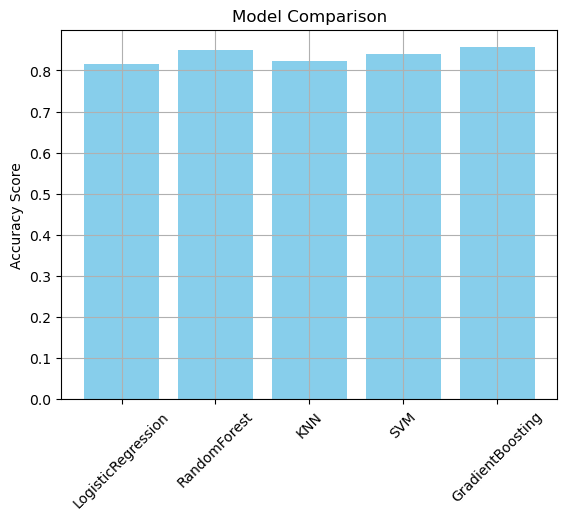

In [92]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.8136
RandomForest: 0.8491
KNN: 0.8211
SVM: 0.8383
GradientBoosting: 0.8562

✅ Best model: GradientBoosting with accuracy 0.8562
✅ Saved best model as best_model.pkl


In [97]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

# 👉 Manually encode strings to numbers (just like you did during training)
education_map = {
    "Bachelors": 0,
    "HS-grad": 1,
    "Masters": 2,
    "PhD": 3,
    "Assoc": 4,
    "Some-college": 5
}
input_df["education"] = input_df["education"].map(education_map)

occupation_map = {
    "Tech-support": 0,
    "Craft-repair": 1,
    "Other-service": 2,
    "Sales": 3,
    "Exec-managerial": 4,
    "Prof-specialty": 5,
    "Handlers-cleaners": 6,
    "Machine-op-inspct": 7,
    "Adm-clerical": 8,
    "Farming-fishing": 9,
    "Transport-moving": 10,
    "Priv-house-serv": 11,
    "Protective-serv": 12,
    "Armed-Forces": 13
}
input_df["occupation"] = input_df["occupation"].map(occupation_map)
# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting app.py


In [98]:
import os
print(os.getcwd())

C:\Users\91828
